In [1]:
import cv2

In [2]:
import urllib.request

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png') # get the image

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8) # convert the image to a numpy.ndarray

In [8]:
img = cv2.imdecode(arr,-1) # Decompress the image

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to BRG -> RGB

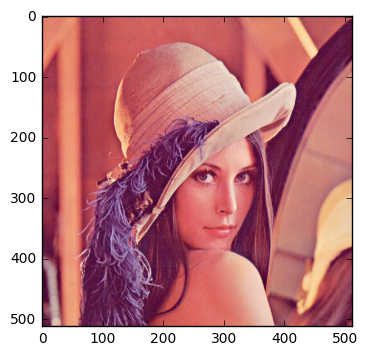

In [10]:
plt.imshow(img)

In [11]:
buf = img.copy() # Create a copy of arr

In [12]:
pyramid = [img] # The base of the pyramid is buf

In [13]:
# Create the rest of the pyramid
for i in range(5):
    print(i, len(pyramid), len(pyramid[i]))
    buf = cv2.pyrDown(buf)
    pyramid.append(buf)

0 1 512
1 2 256
2 3 128
3 4 64
4 5 32


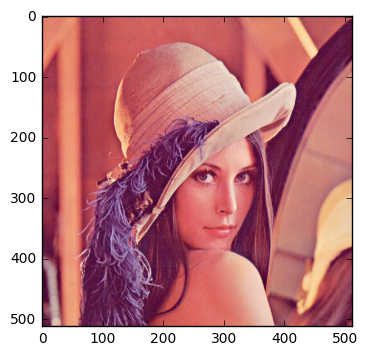

In [14]:
plt.imshow(pyramid[0]);

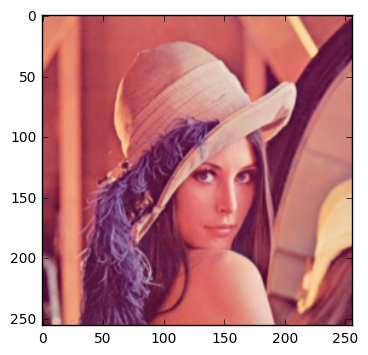

In [15]:
plt.imshow(pyramid[1])

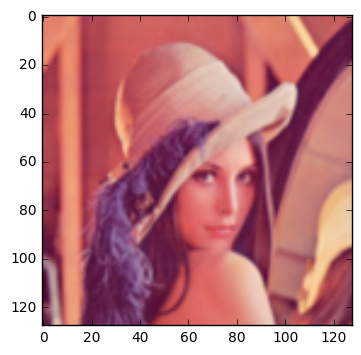

In [16]:
plt.imshow(pyramid[2])

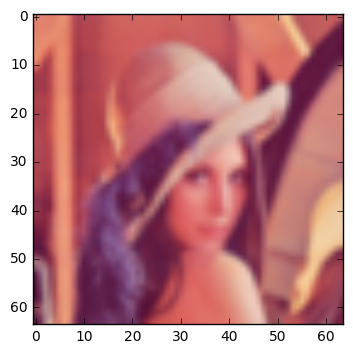

In [17]:
plt.imshow(pyramid[3])

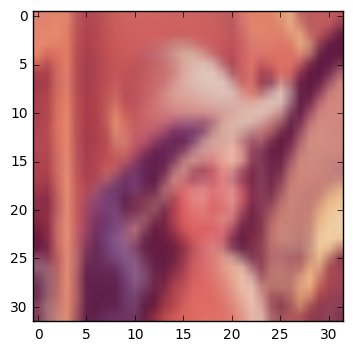

In [18]:
plt.imshow(pyramid[4])

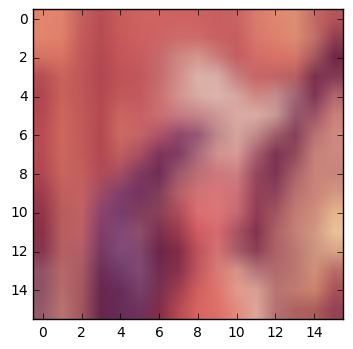

In [19]:
plt.imshow(pyramid[5])